# Derivados Financieros 2021 - Clase 5

    1) Montecarlo


## 1) Metodo de Montecarlo

In [1]:
import sys
sys.path.append('..')
from Codigo.opcion_europea_bs import opcion_europea_bs
from Codigo.opcion_europea_mc import opcion_europea_mc

import math

opcion_europea_mc
Def
    Calculador del precio de una opcion Europea con el modelo de MonteCarlo
Inputs
    - tipo : string - Tipo de contrato entre ["CALL","PUT"]
    - S : float - Spot price del activo
    - K : float - Strike price del contrato
    - T : float - Tiempo hasta la expiracion (en años)
    - r : float - Tasa 'libre de riesgo' (anualizada)
    - sigma : float - Volatilidad implicita (anualizada)
    - div : float - Tasa de dividendos continuos (anualizada)
    - pasos : int - Cantidad de caminos de montecarlo
Outputs
    - precio_MC: float - Precio del contrato


In [45]:
#Inicializo los parametros


tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.25
div = 0

import matplotlib.pyplot as plt

Simulaciones del Browniano Geometrico

Text(0, 0.5, 'Precio [USD]')

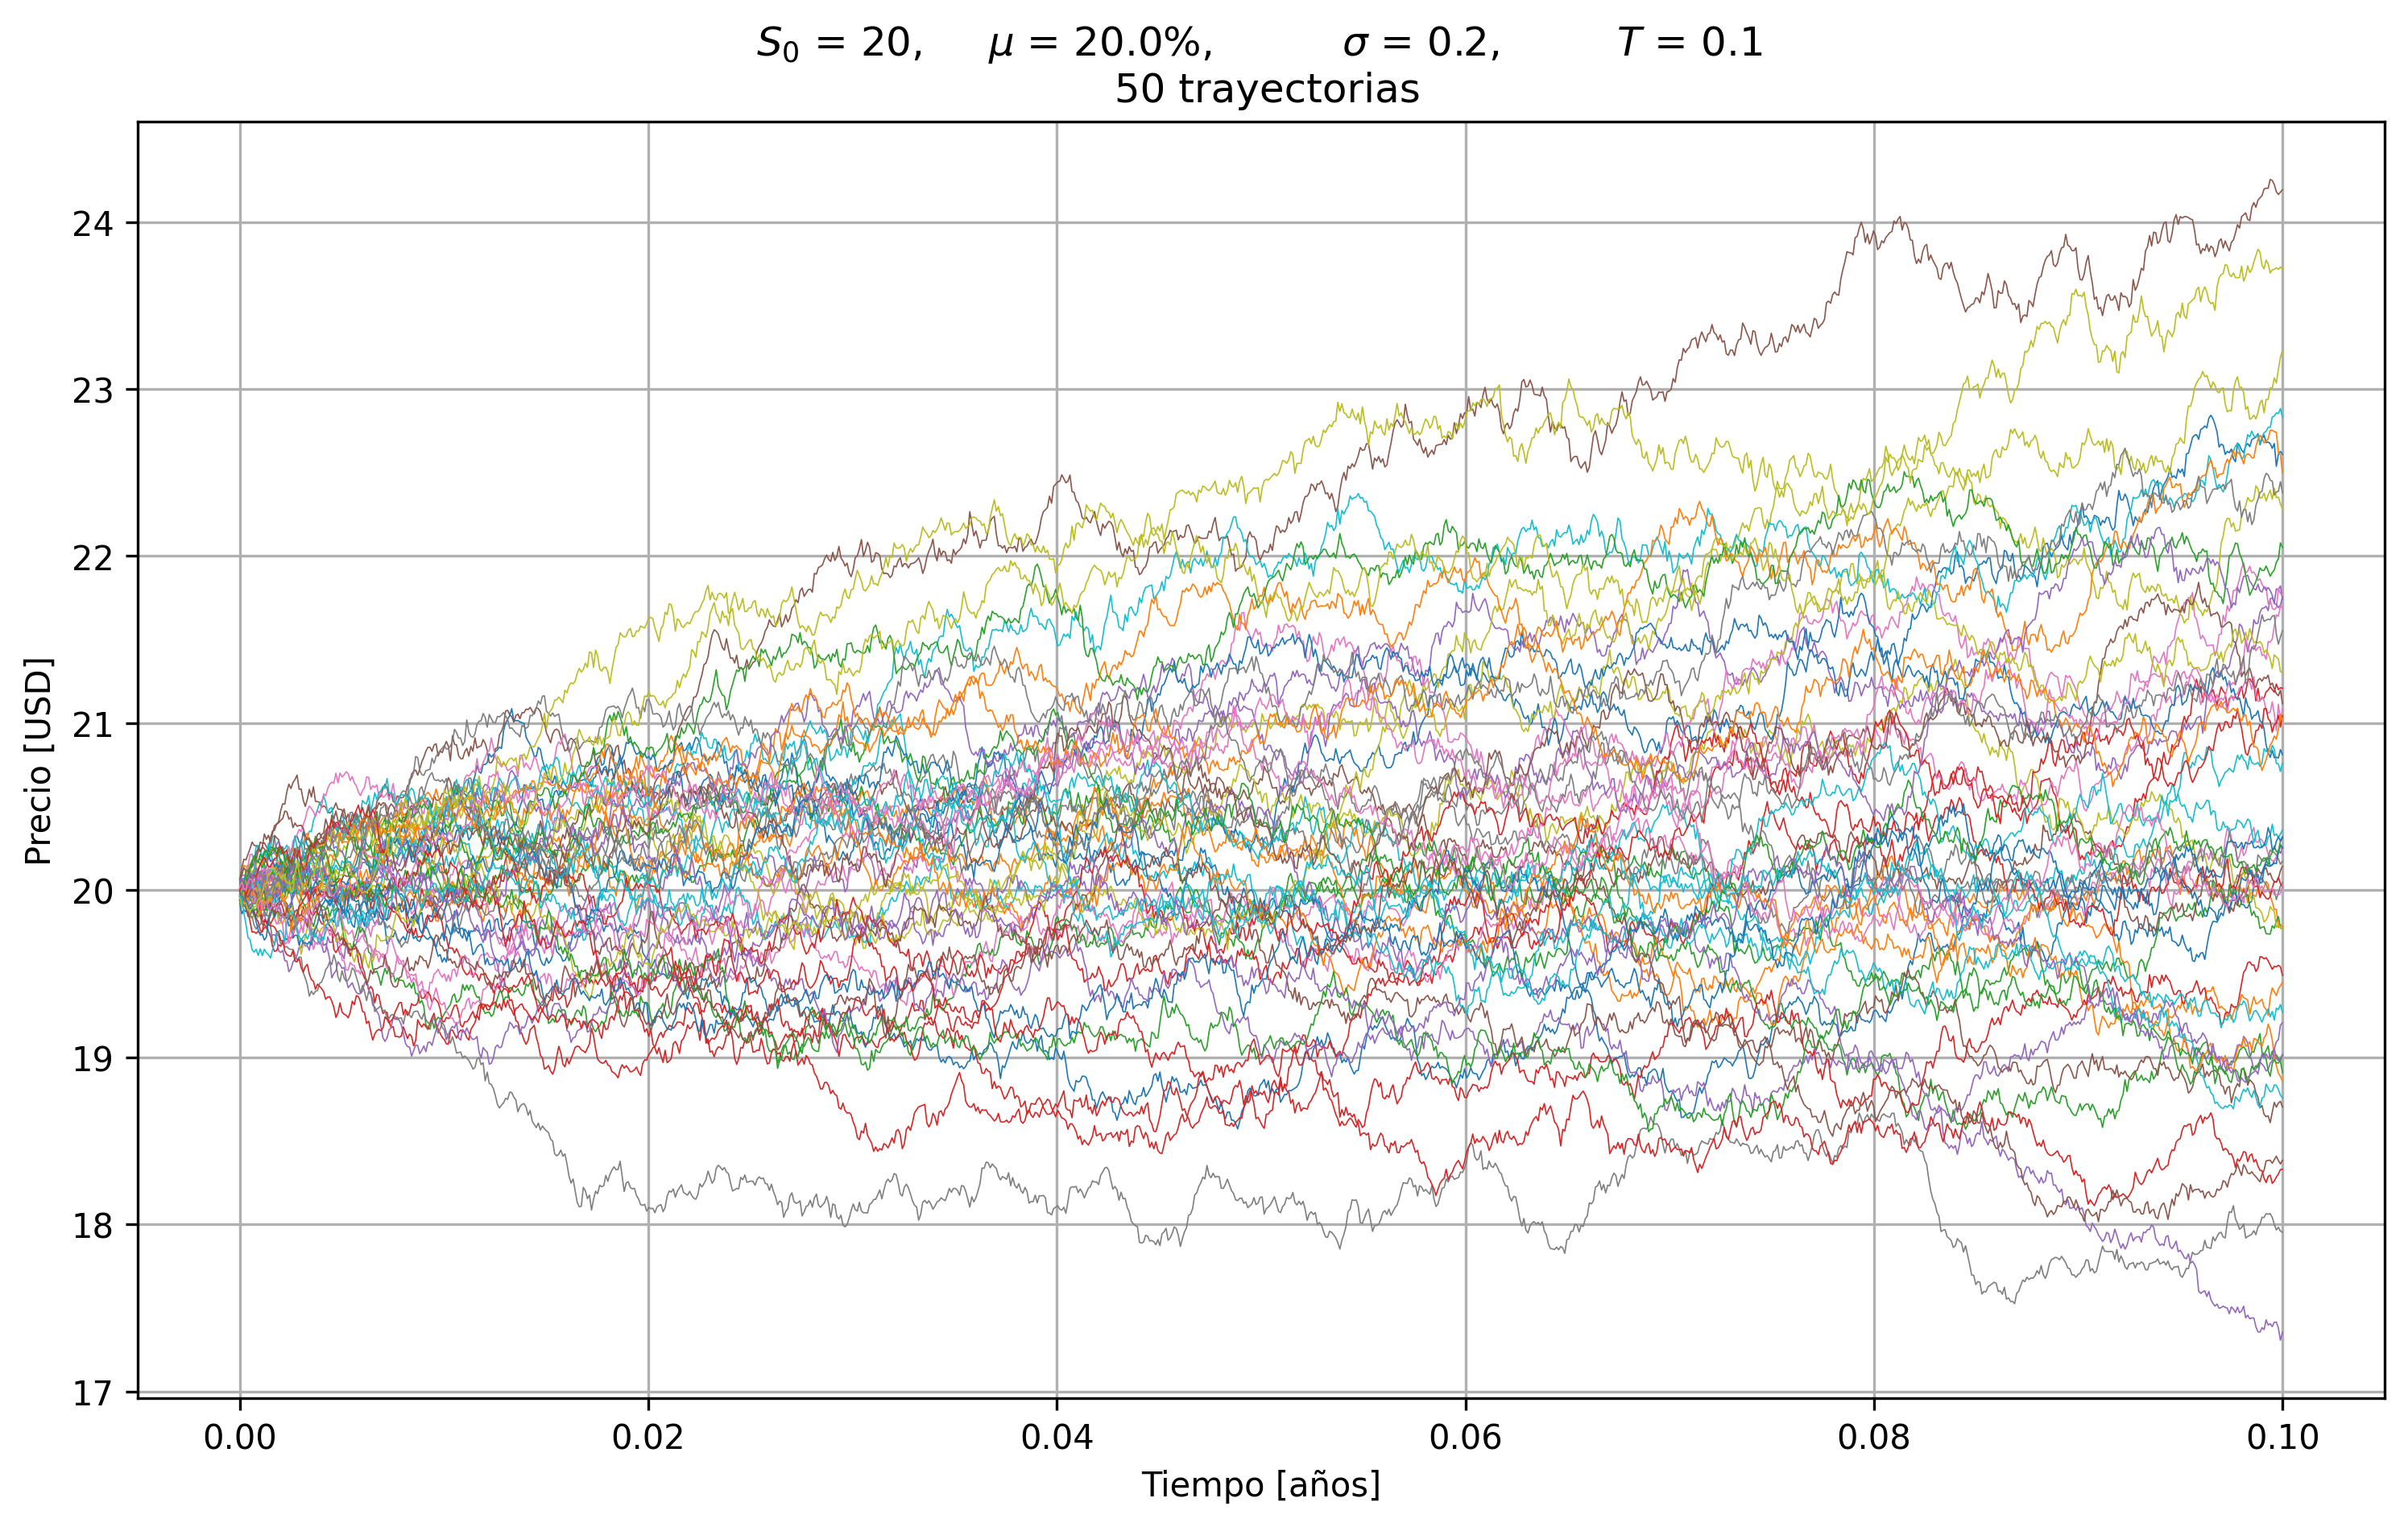

In [47]:
T = .1        # Tiempo hasta madurez de la opción (1 año)
mu = 0.2    # Tasa de crecimiento esperada del activo
sigma = 0.2 # Volatilidad del proceso
S0 = 20      # Condición inicial (precio inicial)
dt = 0.0001  # Paso de tiempo (en la misma unidad que T).
M = 50      # Cantidad de trayectorias a simular en 1 pasada.
N = round(T/dt)
t = np.linspace(0, T, N)

# Configuración del gráfico
fig = plt.figure(figsize=(12,7), dpi = 300)
ax = fig.add_subplot()
ax.set_title(f'$ S_0$ = {S0}, \t $\mu$ = {100*mu}%, \t $\sigma$ = {sigma}, \t $T$ = {T} \n {M} trayectorias')

# Simulación y gráfico
for _ in range(M):
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt)   ### proceso de Wiener ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X)   ### movimiento Browniano geométrico ###
    ax.plot(t, S, lw = 0.4)
ax.grid(True, linestyle='-')
ax.set_xlabel('Tiempo [años]')
ax.set_ylabel('Precio [USD]')
#plt.show()


In [5]:
import numpy as np
#Tomo un vector de normales aleatorias
pasos = 10
z = np.random.normal(0,1,pasos)

opcion = np.zeros(pasos) #En el ppt. C = C_i
z

array([ 0.11859257,  0.8434936 ,  0.39679995,  0.24987346, -1.07725309,
        0.60242849, -1.31695265, -0.41903279,  1.2734827 ,  0.14242531])

In [6]:
for i in range(0,pasos):
    if tipo == "C":
        
        S_i = S * math.exp((r-div - 0.5 * math.pow(sigma,2)) * T + sigma * math.sqrt(T)  * z[i])
        print(S_i)
        payoff = max( 0 , S_i - K) # max(0,S_i-K)
    elif tipo == "P":
        payoff = max(0, K - S * math.exp((r-div - 0.5 * math.pow(sigma, 2)) * T + sigma * math.sqrt(T) * z[i]) )
    opcion[i] = math.exp(-r * T) * payoff #C_i


104.95884572611864
125.81261103555971
112.51878353205105
108.46077107419012
77.83622300914476
118.45430917288027
73.30890025687916
91.758670823549
140.09081097810173
105.58607681481588


In [7]:
opcion

array([ 4.71699997, 24.55371514, 11.90823525,  8.0481344 ,  0.        ,
       17.55428189,  0.        ,  0.        , 38.13555905,  5.31364063])

In [8]:
precio_MC = np.mean(opcion)

precio_MC

desvio = math.sqrt(np.var(opcion)/pasos)

print("precio",precio_MC)
print("desvio", desvio)

precio 11.023056634315386
desvio 3.751458687536882


In [10]:
opcion_europea_bs(tipo, S, K, T, r, sigma, div)

12.335998930368717

In [42]:
opcion_europea_mc(tipo, S, K, T, r, sigma, div, 10000)
 

12.159777166253704

### Convergencia del metodo

In [48]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0.0

pasos_vec = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,30,40,50,75,100,125,150,200,250,300, 500, 5000, 20000]      
precios = np.zeros(len(pasos_vec))

for index in range(len(pasos_vec)):
    precios[index] = opcion_europea_mc(tipo, S, K, T, r, sigma, div, pasos_vec[index])
 
precio_BS = opcion_europea_bs(tipo, S, K, T, r, sigma, div)

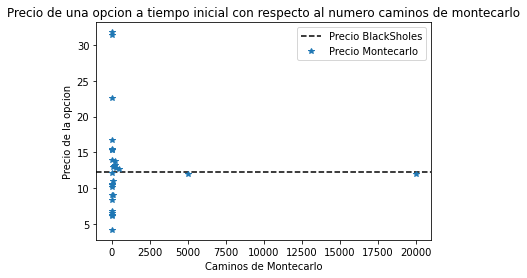

In [49]:
from matplotlib import pyplot as plt
plt.axhline(y=precio_BS, color = 'black', linestyle='--', label='Precio BlackSholes')
plt.plot(pasos_vec,precios,'*', label='Precio Montecarlo')

plt.legend()

plt.xlabel('Caminos de Montecarlo')
plt.ylabel('Precio de la opcion')
plt.title('Precio de una opcion a tiempo inicial con respecto al numero caminos de montecarlo')

plt.show()

In [17]:
print(precio_BS, precios)



12.335998930368717 [ 0.          0.         35.73467071 37.47264361  1.51812203 22.95961754
 16.15417201 15.59766513 17.50509074 21.04413106 12.86564765 24.53730865
 13.48978836 15.91110551  9.44075073 13.31260455 13.41476642 14.5105142
 10.64380429  9.76758525 12.05259051 10.36914133 11.45939795 15.97791531
 12.97336303 12.62852455 12.51686425 12.46590141 12.36181596]
